# Imports

In [1]:
import pyxdf
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("utils"), '..')))
from utils import *

# Load Data

In [3]:
sub_files = glob('/Users/camilla.strauss/Desktop/CUNY_Data/Data/*/*.xdf')

In [5]:
# Load data for each participant
all_et_dfs = {}
sub_names = {}
for sub_number in range(len(sub_files)): 
    xdf_path = sub_files[sub_number]
    sub_names[sub_number] = xdf_path.split('/')[6].split('-')[1]
    
    et_df = import_et_data(xdf_path)
    stim_df = import_stim_data(xdf_path)
    et_resting = get_event_data('RestingState', et_df, stim_df)
    all_et_dfs[sub_number] = et_resting


# hist of euclidian distances between left and right eye gaze points

In [15]:
def gaze_point_histogram(sub_number, ax):
    
    # euclid distance 
    x1 =  all_et_dfs[sub_number].right_gaze_point_on_display_area_0
    x2 =  all_et_dfs[sub_number].left_gaze_point_on_display_area_0
    y1 =  all_et_dfs[sub_number].right_gaze_point_on_display_area_1
    y2 =  all_et_dfs[sub_number].left_gaze_point_on_display_area_1
    dists = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # return vars
    sub_name = sub_names[sub_number]
    dmax = np.nanmax(dists)
    rest_nsamp = len(all_et_dfs[sub_number])
    srate = np.round(1/(all_et_dfs[sub_number]['diff'].median()), 3)


    # plot
    if ax is None:
        fig, ax = plt.subplots()

    ax.hist(dists, bins =75, alpha = 0.6, label = sub_name)
    ax.set_title(f'Distribution of Distances Between \nLeft and Right Gaze Points for Subject {sub_name} in Resting State')
    ax.set_xlabel('Distance between L + R Gaze Points')
    ax.set_ylabel('Count')

    return sub_name, dmax, rest_nsamp, srate, ax

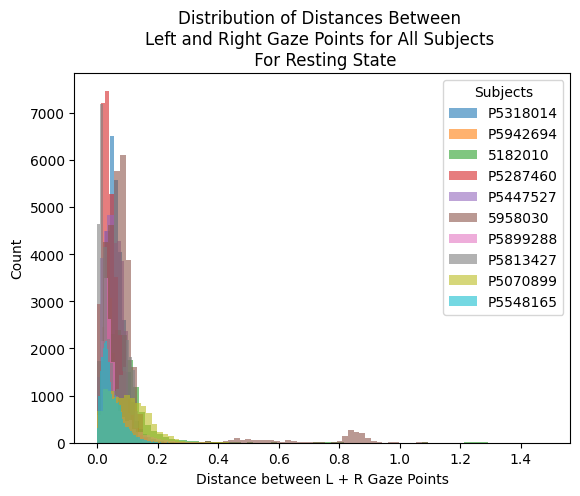

In [16]:
fig, ax = plt.subplots()
results = []

for sub_number in range(len(sub_files)):
    sub_name, dmax, rest_nsamp, srate, _ = gaze_point_histogram(sub_number, ax=ax)  # Pass shared axes
    results.append({'sub_number': sub_number, 'sub_id': sub_name, 'dmax': dmax, 'rest_nsamp': rest_nsamp, 'srate': srate})

ax.legend(title = 'Subjects')
ax.set_title('Distribution of Distances Between \nLeft and Right Gaze Points for All Subjects \n For Resting State')
plt.show()

In [17]:
pprint(results, width = 200, sort_dicts = False)

[{'sub_number': 0, 'sub_id': 'P5318014', 'dmax': 1.0374001, 'rest_nsamp': 35998, 'srate': 119.996},
 {'sub_number': 1, 'sub_id': 'P5942694', 'dmax': 0.63107157, 'rest_nsamp': 35998, 'srate': 119.996},
 {'sub_number': 2, 'sub_id': '5182010', 'dmax': 1.4889534, 'rest_nsamp': 35998, 'srate': 119.996},
 {'sub_number': 3, 'sub_id': 'P5287460', 'dmax': 1.0295186, 'rest_nsamp': 35999, 'srate': 119.996},
 {'sub_number': 4, 'sub_id': 'P5447527', 'dmax': 0.84232503, 'rest_nsamp': 35998, 'srate': 119.996},
 {'sub_number': 5, 'sub_id': '5958030', 'dmax': 1.4130424, 'rest_nsamp': 35999, 'srate': 119.996},
 {'sub_number': 6, 'sub_id': 'P5899288', 'dmax': 0.87437904, 'rest_nsamp': 35998, 'srate': 119.996},
 {'sub_number': 7, 'sub_id': 'P5813427', 'dmax': 0.79094625, 'rest_nsamp': 35999, 'srate': 119.996},
 {'sub_number': 8, 'sub_id': 'P5070899', 'dmax': 1.3616846, 'rest_nsamp': 35999, 'srate': 119.996},
 {'sub_number': 9, 'sub_id': 'P5548165', 'dmax': 0.34537977, 'rest_nsamp': 35999, 'srate': 119.996

# Line plots- gaze point difference over time



## Distance between gaze points over time

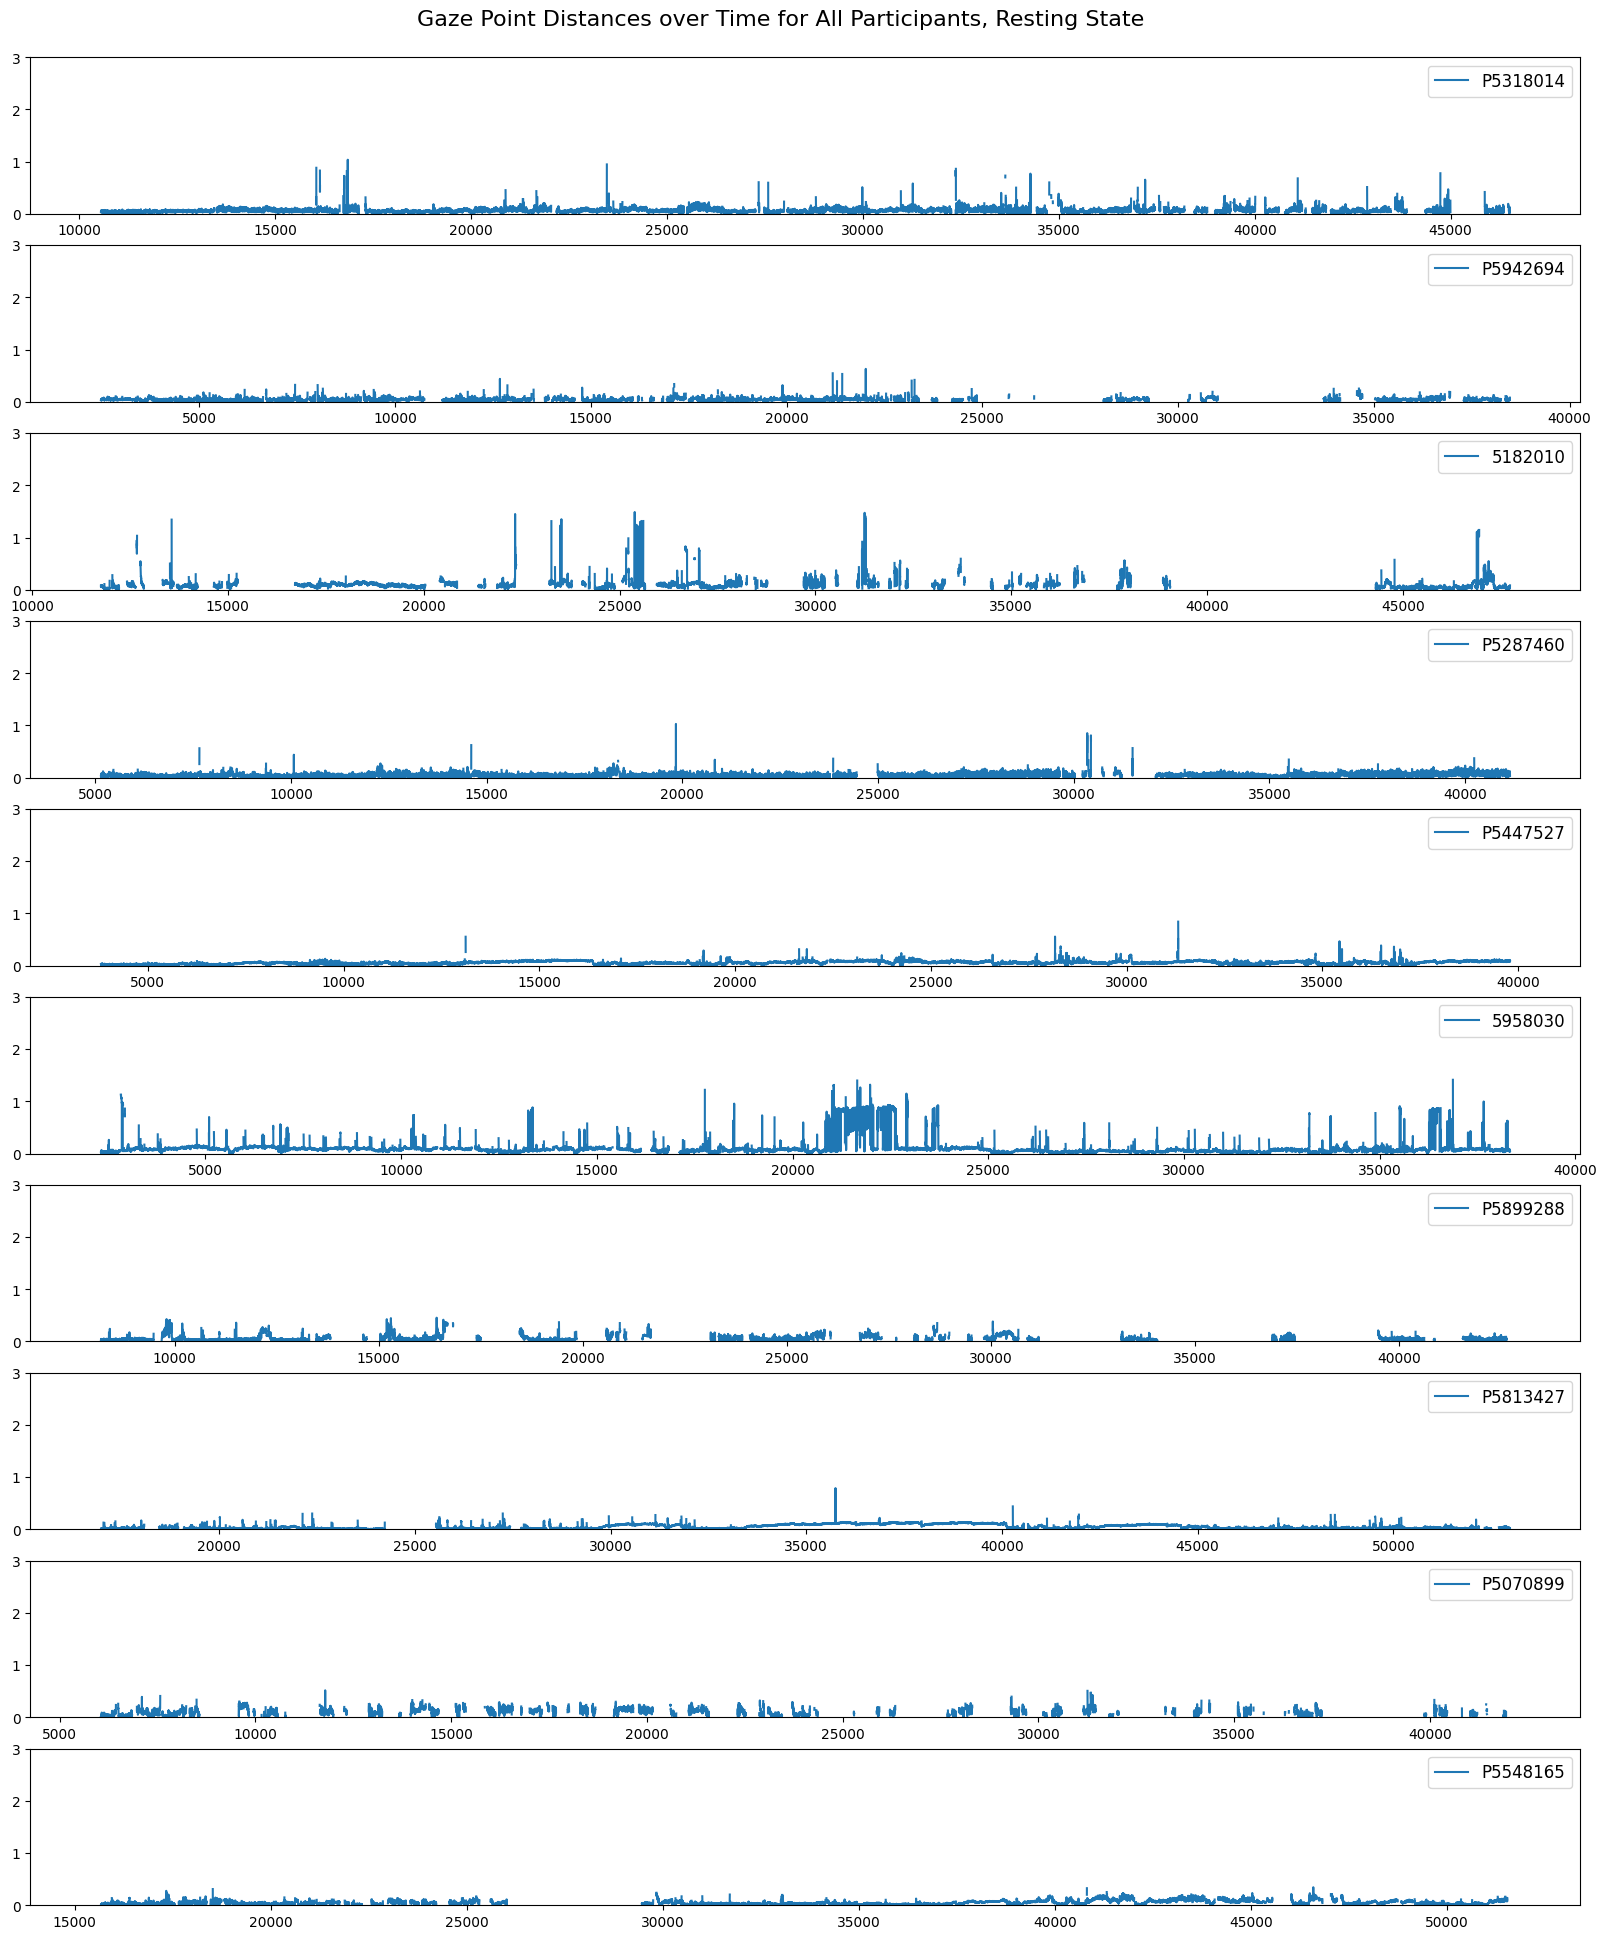

In [18]:
# different axes 
fig, ax = plt.subplots(figsize=(20,24), nrows=len(sub_files), ncols=1)

for sub_number in range(len(sub_files)):
    x1 = all_et_dfs[sub_number].right_gaze_point_on_display_area_0
    x2 = all_et_dfs[sub_number].left_gaze_point_on_display_area_0
    y1 = all_et_dfs[sub_number].right_gaze_point_on_display_area_1
    y2 = all_et_dfs[sub_number].left_gaze_point_on_display_area_1
    dists = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    ax[sub_number].plot(dists, label = sub_names[sub_number])
    ax[sub_number].set_ylim(0, 3)
    # ax[sub_number].set_xlim(0, 310000)
    ax[sub_number].legend(fontsize = 'large')

fig.suptitle("Gaze Point Distances over Time for All Participants, Resting State", y = .9, fontsize = 16)
plt.show()

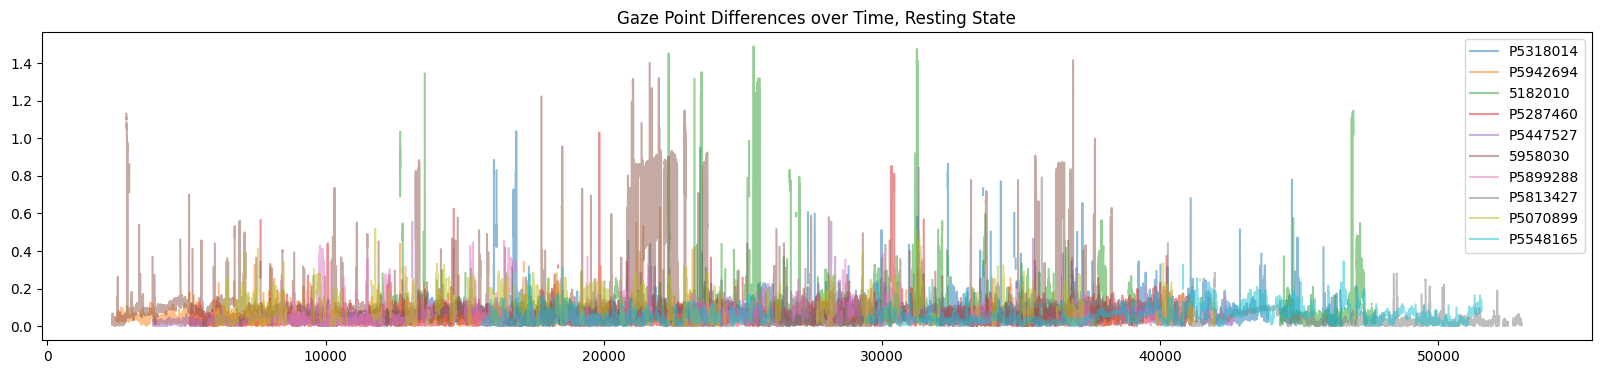

In [19]:
# shared axes 
fig = plt.figure(figsize = (20, 4))
for sub_number in range(len(sub_files)):
    x1 = all_et_dfs[sub_number].right_gaze_point_on_display_area_0
    x2 = all_et_dfs[sub_number].left_gaze_point_on_display_area_0
    y1 = all_et_dfs[sub_number].right_gaze_point_on_display_area_1
    y2 = all_et_dfs[sub_number].left_gaze_point_on_display_area_1
    dists = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    plt.plot(dists, alpha = 0.5, label = sub_names[sub_number])
plt.title("Gaze Point Differences over Time, Resting State")
plt.legend()
plt.show()

# Example gaze point plot

In [85]:
idxmax = dists.idxmax()

(-2.0, 2.0)

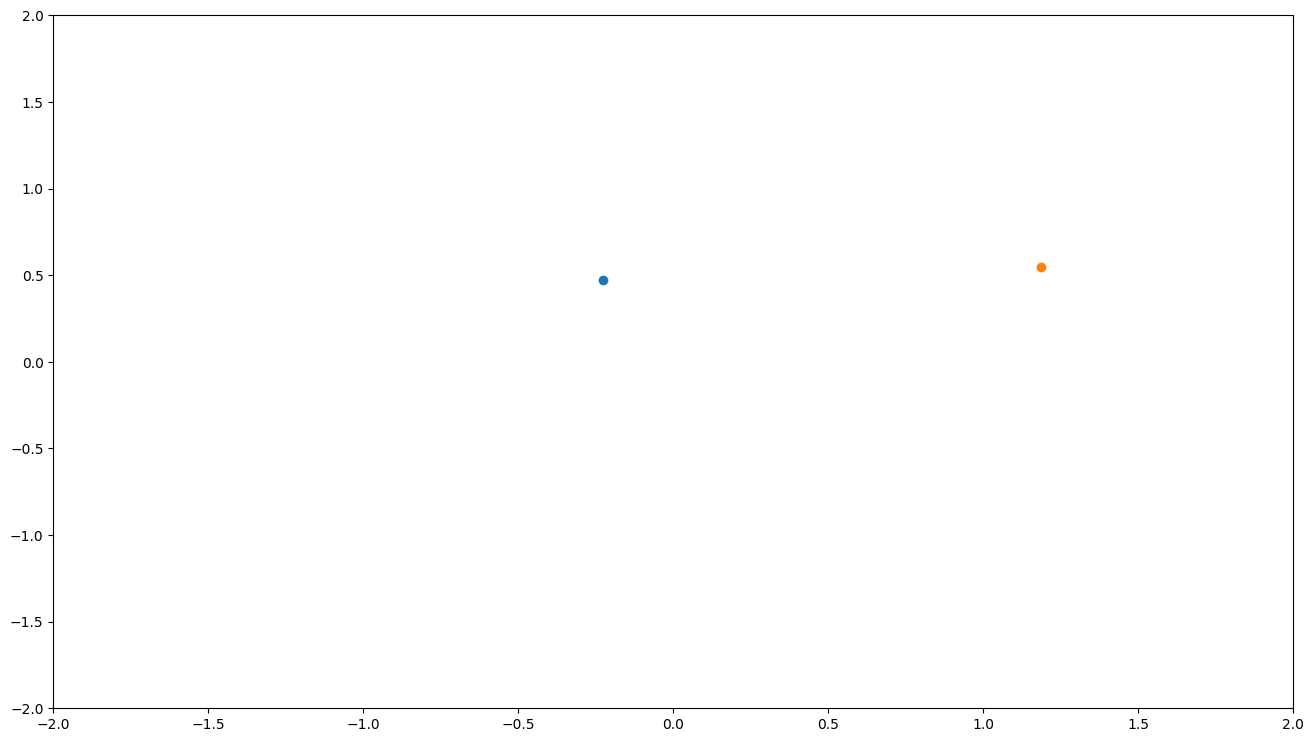

In [86]:
plt.figure(figsize = (16,9))
plt.plot(all_et_dfs[5].right_gaze_point_on_display_area_0[idxmax], all_et_dfs[5].right_gaze_point_on_display_area_1[idxmax], marker = 'o')
plt.plot(all_et_dfs[5].left_gaze_point_on_display_area_0[idxmax], all_et_dfs[5].left_gaze_point_on_display_area_1[idxmax], marker = 'o')
plt.xlim([-2, 2])
plt.ylim([-2,2])
